# 클러스터링 K-Means

데이터 불러오기

In [169]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

PVP

0. It was [MASK]. x
1. x All in all, it was [MASK].
2. Just [MASK]!
3. In summary, the restaurant is [MASK].

4. x Taking everything into account, it was [MASK].
5. x To wrap it up, it was [MASK].
6. x Generally, it seems [MASK].
7. x In a nutshell, [MASK].
8. The place had a [MASK] vibe. x
9. Everything gave off a [MASK] impression.x

good

In [170]:
pattern_good_0 = "It was good."
pattern_good_1 = "All in all, it was good."
pattern_good_2 = "Just good!"
pattern_good_3 = "In summary, the restaurant is good."
pattern_good_4 = "Taking everything into account, it was good."
pattern_good_5 = "To wrap it up, it was good."
pattern_good_6 = "Generally, it seems good."
pattern_good_7 = "In a nutshell, good."
pattern_good_8 = "The place had a good vibe."
pattern_good_9 = "Everything gave off a good impression."

In [171]:
sentences_good = [
    pattern_good_0,
    pattern_good_1,
    pattern_good_2,
    pattern_good_3,
    pattern_good_4,
    pattern_good_5,
    pattern_good_6,
    pattern_good_7,
    pattern_good_8,
    pattern_good_9,
]

임베딩

In [172]:
from transformers import RobertaTokenizer, RobertaModel
import torch

In [173]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-large')
model = RobertaModel.from_pretrained('roberta-large')

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [175]:
input_ids_good = torch.tensor([tokenizer.encode(sent, add_special_tokens=True, padding='max_length', truncation=True, max_length=32) for sent in sentences_good])

In [176]:
with torch.no_grad():
    model.eval()
    embeddings_good = model(input_ids_good)[0]

In [177]:
flattened_embeddings_good = torch.mean(embeddings_good, dim=1)
embeddings_np_good = flattened_embeddings_good.numpy()

In [178]:
num_clusters = 3

In [243]:
kmeans_good = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels_good = kmeans_good.fit_predict(embeddings_np_good)

c:\Users\user\anaconda3\envs\PY39_\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [244]:
# 문장 / 클러스터 / 중심 벡터 확인
cluster_data_good = {
    "Sentence": sentences_good,
    "Vector": embeddings_np_good.tolist(),
    "Cluster": cluster_labels_good,
    "Centroid Vector": [kmeans_good.cluster_centers_[i] for i in cluster_labels_good],
}
df_cluster_data_good = pd.DataFrame(cluster_data_good)

In [245]:
df_cluster_data_good

,Sentence,Vector,Cluster,Centroid Vector
0,It was good.,"[-0.21478337049484253, 0.5505541563034058, -0....",1,"[-0.21478336, 0.55055416, -0.65014356, 0.53784..."
1,"All in all, it was good.","[0.08696834743022919, 0.008737122640013695, -0...",0,"[0.1039329, 0.021140054, -0.1653259, 0.0381702..."
2,Just good!,"[0.1829804927110672, 0.4087640643119812, -0.54...",2,"[0.07447437, 0.4159885, -0.48751757, 0.2233334..."
3,"In summary, the restaurant is good.","[0.10899806767702103, 0.05437375605106354, -0....",0,"[0.1039329, 0.021140054, -0.1653259, 0.0381702..."
4,"Taking everything into account, it was good.","[0.130397230386734, 0.03923868387937546, -0.16...",0,"[0.1039329, 0.021140054, -0.1653259, 0.0381702..."
5,"To wrap it up, it was good.","[0.046118754893541336, -0.034946996718645096, ...",0,"[0.1039329, 0.021140054, -0.1653259, 0.0381702..."
6,"Generally, it seems good.","[0.030870070680975914, -0.039086319506168365, ...",0,"[0.1039329, 0.021140054, -0.1653259, 0.0381702..."
7,"In a nutshell, good.","[0.126734659075737, -0.03050783835351467, -0.0...",0,"[0.1039329, 0.021140054, -0.1653259, 0.0381702..."
8,The place had a good vibe.,"[0.1974431872367859, 0.15017201006412506, -0.2...",0,"[0.1039329, 0.021140054, -0.1653259, 0.0381702..."
9,Everything gave off a good impression.,"[-0.03403174877166748, 0.4232129454612732, -0....",2,"[0.07447437, 0.4159885, -0.48751757, 0.2233334..."


In [246]:
# 중심문장 알아보기
representative_sentences_good = []
for i in range(num_clusters):
    cluster_indices = np.where(cluster_labels_good == i)[0]
    cluster_embeddings = embeddings_np_good[cluster_indices]
    centroid_vector = kmeans_good.cluster_centers_[i]
    centroid_vector = np.tile(centroid_vector, (cluster_embeddings.shape[0], 1))
    closest_index = np.argmin(np.linalg.norm(cluster_embeddings - centroid_vector, axis=1))
    representative_sentence = sentences_good[cluster_indices[closest_index]]
    representative_sentences_good.append(representative_sentence)

for i, sentence in enumerate(representative_sentences_good):
    print(f"Cluster {i + 1} - Representative Sentence: '{sentence}'")

Cluster 1 - Representative Sentence: 'To wrap it up, it was good.'
Cluster 2 - Representative Sentence: 'It was good.'
Cluster 3 - Representative Sentence: 'Just good!'


# 전체의 중심벡터와의 거리

In [247]:
all_center_vector_good = np.mean(embeddings_np_good, axis=0)

전체의 중심벡터와의 거리(유클리드)_클수록 멀다

In [248]:
euclidean_distance_good = np.zeros(embeddings_np_good.shape[0])

In [249]:
for i in range(embeddings_np_good.shape[0]):
    euclidean_distance_good[i] = np.linalg.norm(embeddings_np_good[i] - all_center_vector_good)

In [250]:
euclidean_distance_good

array([9.66908836, 3.53352833, 8.48380089, 5.26765776, 4.35486221,
       3.58219171, 3.42800283, 4.9894762 , 3.81193972, 5.93755054])

bad

In [251]:
pattern_bad_0 = "It was bad."
pattern_bad_1 = "All in all, it was bad."
pattern_bad_2 = "Just bad!"
pattern_bad_3 = "In summary, the restaurant is bad."
pattern_bad_4 = "Taking everything into account, it was bad."
pattern_bad_5 = "To wrap it up, it was bad."
pattern_bad_6 = "Generally, it seems bad."
pattern_bad_7 = "In a nutshell, bad."
pattern_bad_8 = "The place had a bad vibe."
pattern_bad_9 = "Everything gave off a bad impression."

In [252]:
sentences_bad = [
    pattern_bad_0,
    pattern_bad_1,
    pattern_bad_2,
    pattern_bad_3,
    pattern_bad_4,
    pattern_bad_5,
    pattern_bad_6,
    pattern_bad_7,
    pattern_bad_8,
    pattern_bad_9,
]

In [253]:
input_ids_bad = torch.tensor([tokenizer.encode(sent, add_special_tokens=True, padding='max_length', truncation=True, max_length=32) for sent in sentences_bad])

In [254]:
with torch.no_grad():
    model.eval()
    embeddings_bad = model(input_ids_bad)[0]

In [255]:
flattened_embeddings_bad = torch.mean(embeddings_bad, dim=1)
embeddings_np_bad = flattened_embeddings_bad.numpy()

In [256]:
kmeans_bad = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels_bad = kmeans_bad.fit_predict(embeddings_np_bad)

c:\Users\user\anaconda3\envs\PY39_\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [257]:
cluster_data_bad = {
    "Sentence": sentences_bad,
    "Vector": embeddings_np_bad.tolist(),
    "Cluster": cluster_labels_bad,
    "Centroid Vector": [kmeans_bad.cluster_centers_[i] for i in cluster_labels_bad],
}
df_cluster_data_bad = pd.DataFrame(cluster_data_bad)

In [258]:
df_cluster_data_bad

,Sentence,Vector,Cluster,Centroid Vector
0,It was bad.,"[-0.13653989136219025, 0.791196346282959, -0.5...",1,"[-0.13653989, 0.79119635, -0.534098, 0.1279827..."
1,"All in all, it was bad.","[0.12056316435337067, 0.09876592457294464, -0....",0,"[0.15526329, 0.029701762, -0.23348857, -0.0647..."
2,Just bad!,"[0.3127707540988922, 0.008738189935684204, -0....",2,"[0.18086562, 0.10949418, -0.427746, 0.01422318..."
3,"In summary, the restaurant is bad.","[0.36867088079452515, -0.059411048889160156, -...",0,"[0.15526329, 0.029701762, -0.23348857, -0.0647..."
4,"Taking everything into account, it was bad.","[0.13010944426059723, 0.083163321018219, -0.30...",0,"[0.15526329, 0.029701762, -0.23348857, -0.0647..."
5,"To wrap it up, it was bad.","[0.10257554054260254, 0.008314615115523338, -0...",0,"[0.15526329, 0.029701762, -0.23348857, -0.0647..."
6,"Generally, it seems bad.","[0.08288760483264923, 0.006541324779391289, -0...",0,"[0.15526329, 0.029701762, -0.23348857, -0.0647..."
7,"In a nutshell, bad.","[0.10015606135129929, 0.026305150240659714, -0...",0,"[0.15526329, 0.029701762, -0.23348857, -0.0647..."
8,The place had a bad vibe.,"[0.18188033998012543, 0.04423307254910469, -0....",0,"[0.15526329, 0.029701762, -0.23348857, -0.0647..."
9,Everything gave off a bad impression.,"[0.04896049201488495, 0.21025016903877258, -0....",2,"[0.18086562, 0.10949418, -0.427746, 0.01422318..."


In [259]:
# 중심문장 알아보기
representative_sentences_bad = []
for i in range(num_clusters):
    cluster_indices = np.where(cluster_labels_bad == i)[0]
    cluster_embeddings = embeddings_np_bad[cluster_indices]
    centroid_vector = kmeans_bad.cluster_centers_[i]
    centroid_vector = np.tile(centroid_vector, (cluster_embeddings.shape[0], 1))
    closest_index = np.argmin(np.linalg.norm(cluster_embeddings - centroid_vector, axis=1))
    representative_sentence = sentences_good[cluster_indices[closest_index]]
    representative_sentences_bad.append(representative_sentence)

for i, sentence in enumerate(representative_sentences_bad):
    print(f"Cluster {i + 1} - Representative Sentence: '{sentence}'")

Cluster 1 - Representative Sentence: 'All in all, it was good.'
Cluster 2 - Representative Sentence: 'It was good.'
Cluster 3 - Representative Sentence: 'Just good!'


중심벡터_bad

In [260]:
all_center_vector_bad = np.mean(embeddings_np_bad, axis=0)

전체 중심벡터와의 거리

In [261]:
euclidean_distance_bad = np.zeros(embeddings_np_bad.shape[0])

In [262]:
for i in range(embeddings_np_bad.shape[0]):
    euclidean_distance_bad[i] = np.linalg.norm(embeddings_np_bad[i] - all_center_vector_bad)

In [263]:
euclidean_distance_bad

array([11.02524948,  2.58820391,  4.30388546,  3.9355011 ,  3.56832004,
        4.34391212,  2.98811555,  4.65435219,  4.00161076,  4.97521305])

# 가장 이질적인 것
후보 good : [0, 2, 5], bad : [0, 1, 2]

In [264]:
candi_1 = [0, 2, 5]

In [265]:
candi_1_list = []
for i in candi_1:
    candi_1_list.append(euclidean_distance_good[i])
    candi_1_list.append(euclidean_distance_bad[i])


In [266]:
candi_1_list

[9.669088363647461,
 11.025249481201172,
 8.483800888061523,
 4.303885459899902,
 3.5821917057037354,
 4.343912124633789]

In [267]:
candi_1_sum = sum(candi_1_list)

In [268]:
candi_1_sum

41.40812802314758

In [269]:
candi_2 = [0, 1, 2]

In [270]:
candi_2_list = []
for i in candi_2:
    candi_2_list.append(euclidean_distance_good[i])
    candi_2_list.append(euclidean_distance_bad[i])

In [271]:
candi_2_list

[9.669088363647461,
 11.025249481201172,
 3.5335283279418945,
 2.5882039070129395,
 8.483800888061523,
 4.303885459899902]

In [272]:
candi_2_sum = sum(candi_2_list)

In [273]:
candi_2_sum

39.60375642776489

# 클러스터링 시각화 PCA

차원 축소(2차원)(미완)

In [280]:
#차원 줄이기(시각화 위해)
pca = PCA(n_components=2)
embeddings_2d_PCA_good = pd.DataFrame(pca.fit_transform(np.stack(df_cluster_data_good['Vector'].values)), columns=("PCA Component 1", "PCA Component 2"))
embeddings_2d_PCA_good["Cluster"] = df_cluster_data_good["Cluster"]

embeddings_2d_PCA_bad = pd.DataFrame(pca.fit_transform(np.stack(df_cluster_data_bad['Vector'].values)),columns=("PCA Component 1", "PCA Component 2"))
embeddings_2d_PCA_bad["Cluster"] = df_cluster_data_bad["Cluster"]

In [279]:
embeddings_2d_PCA_good

,PCA Component 1,PCA Component 2,Cluster
0,8.793053,3.904568,1
1,-2.667511,0.524844,0
2,7.306944,-3.691453,2
3,-4.596294,0.217197,0
4,-3.410822,-0.255773,0
5,-2.890745,0.105842,0
6,-2.439311,0.136966,0
7,-3.861329,0.907068,0
8,-0.967313,-1.238772,0
9,4.733328,-0.610487,2


In [282]:
embeddings_2d_PCA_bad

,PCA Component 1,PCA Component 2,Cluster
0,10.840154,-1.829283,1
1,-1.620795,-0.622596,0
2,0.731420,3.052445,2
3,-2.722847,-0.296845,0
4,-1.973899,-0.642722,0
5,-3.382561,-0.904686,0
6,-0.916824,0.029332,0
7,-2.808774,-1.977074,0
8,-1.542785,0.995277,0
9,3.396912,2.196152,2


good 그래프

In [286]:
import matplotlib.pyplot as plt

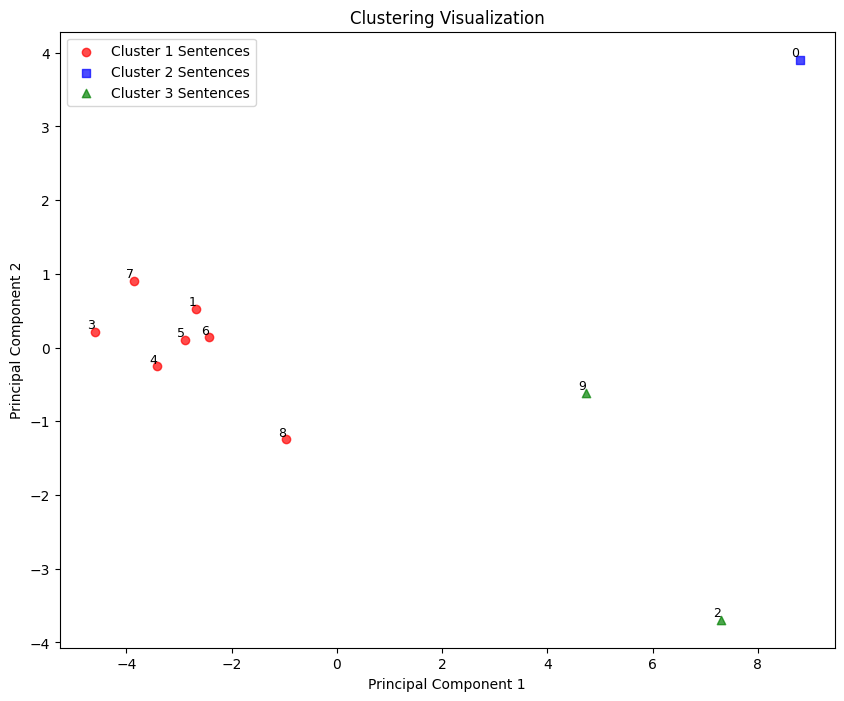

In [287]:
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green']
markers = ['o', 's', '^']

for i in range(num_clusters):
    cluster_data = embeddings_2d_PCA_good[embeddings_2d_PCA_good['Cluster'] == i]
    plt.scatter(cluster_data['PCA Component 1'], cluster_data['PCA Component 2'],
                c=colors[i], marker=markers[i], label=f'Cluster {i+1} Sentences', alpha=0.7)
    for index, row in cluster_data.iterrows():
        plt.text(row['PCA Component 1'], row['PCA Component 2'], str(index), fontsize=9, ha='right', va='bottom')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Visualization')
plt.legend()
plt.show()

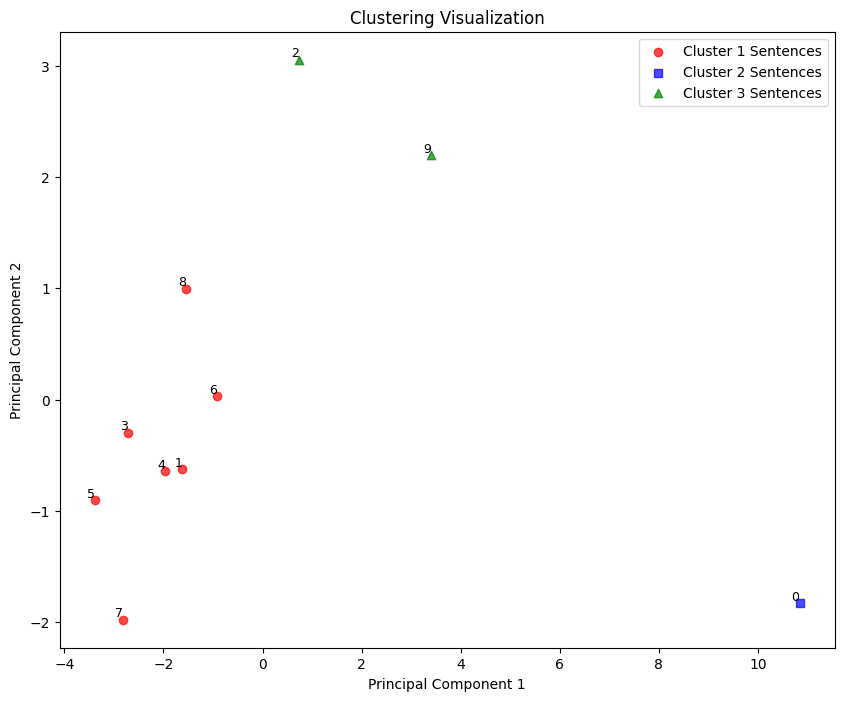

In [288]:
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green']
markers = ['o', 's', '^']

for i in range(num_clusters):
    cluster_data = embeddings_2d_PCA_bad[embeddings_2d_PCA_bad['Cluster'] == i]
    plt.scatter(cluster_data['PCA Component 1'], cluster_data['PCA Component 2'],
                c=colors[i], marker=markers[i], label=f'Cluster {i+1} Sentences', alpha=0.7)
    for index, row in cluster_data.iterrows():
        plt.text(row['PCA Component 1'], row['PCA Component 2'], str(index), fontsize=9, ha='right', va='bottom')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Visualization')
plt.legend()
plt.show()